In [1]:
# Importing the libraries
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Input

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

print("x_train shape:",x_train.shape,"x_test shape:",x_test.shape)

x_train shape: (60000, 28, 28) x_test shape: (10000, 28, 28)


In [3]:
# Building the model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10,activation='softmax')(x)

model = Model(i,x)

In [4]:
# Compile the model
model.compile(
    optimizer='Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.3455 - accuracy: 0.8874 - val_loss: 0.1328 - val_accuracy: 0.9595
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1067 - accuracy: 0.9675 - val_loss: 0.0806 - val_accuracy: 0.9757
Epoch 3/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0723 - accuracy: 0.9785 - val_loss: 0.0742 - val_accuracy: 0.9775
Epoch 4/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0564 - accuracy: 0.9829 - val_loss: 0.0622 - val_accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0455 - accuracy: 0.9858 - val_loss: 0.0519 - val_accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0373 - accuracy: 0.9887 - val_loss: 0.0491 - val_accuracy: 0.9839
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0506 -

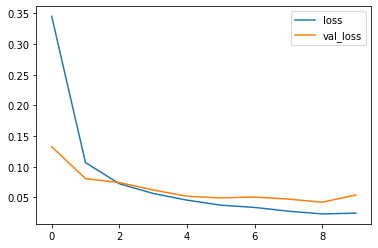

In [6]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

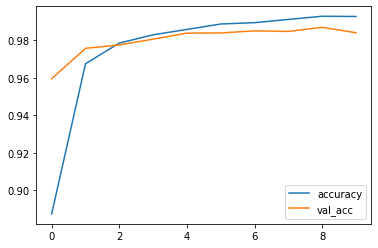

In [8]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 973    0    0    1    0    0    4    2    0    0]
 [   1 1130    1    0    0    0    3    0    0    0]
 [   2    1 1018    2    1    0    2    6    0    0]
 [   0    0    1 1003    0    1    0    3    2    0]
 [   0    1    0    0  960    0    5    4    1   11]
 [   1    0    0    7    0  879    1    0    3    1]
 [   3    2    1    0    3    1  947    0    1    0]
 [   0    3    7    1    1    0    0 1016    0    0]
 [   5    0    5    2    0    2    3    3  953    1]
 [   1    1    3    1   10    4    0   20    8  961]]


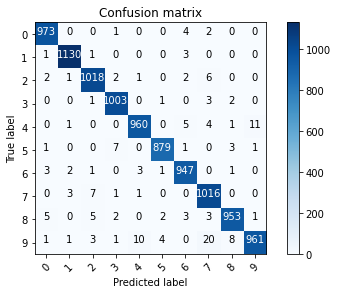

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

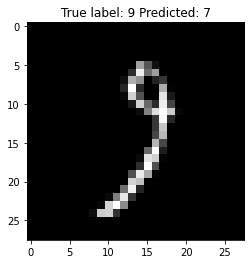

In [17]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));